# Recommender Systems Part I

## Examine the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

We use the famous MovieLens dataset consists of 100000 ratings by 943 users on 1682 items. Each user has rated at least 20 movies. You can find a description of the dataset here.
http://files.grouplens.org/datasets/movielens/ml-100k-README.txt

In [2]:
data_df = pd.read_csv('u.data',delimiter='\t',names=['user_id', 'item_id', 'rating', 'timestamp'])
data_df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


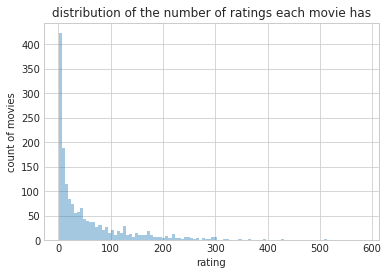

In [7]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax.set_title('distribution of the number of ratings each movie has')
ax.set_xlabel('number of ratings')
ax.set_ylabel('count of movies')
sns.distplot(data_df.groupby('item_id')['rating'].count(),kde=False,bins=100, ax=ax)

The majority of the movies have very few ratings.  

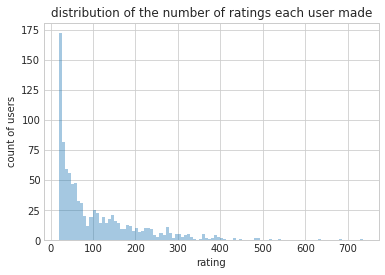

In [8]:
users = data_df.groupby('user_id')['rating'].count()
fig1, ax1 = plt.subplots()
ax1.set_title('distribution of the number of ratings each user made')
ax1.set_xlabel('number of ratings')
ax1.set_ylabel('count of users')
sns.distplot(users,kde=False,bins=100)

Most users have rated fewer than 100 movies, but we can see all have rated at least 20.

Text(0.5,0.98,'number of ratings vs. mean of ratings for each movie')

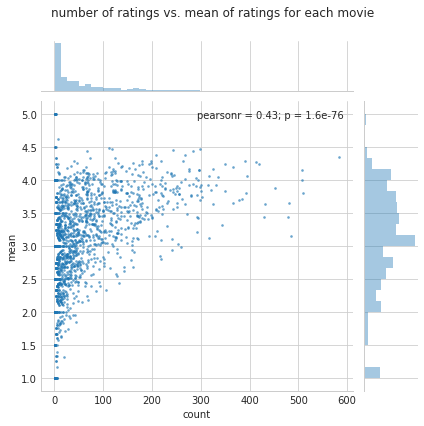

In [15]:
num_of_ratings = data_df.groupby('item_id')['rating'].count()
mean_of_ratings = data_df.groupby('item_id')['rating'].mean()
ratings = pd.DataFrame(num_of_ratings).merge(pd.DataFrame(mean_of_ratings), left_index=True,right_index=True).rename(columns={"rating_x":"count","rating_y":"mean"})
sns.jointplot(data=ratings,x='count',y='mean',s=3,alpha=.5)
plt.subplots_adjust(top=0.9)
plt.gcf().suptitle('number of ratings vs. mean of ratings for each movie') 

So number of ratings and the mean of ratings are positively correlated.